# Market Features Overview

This section explores key market features used in our analysis, including market breadth indicators, technical signals, and sector mappings. For detailed definitions, see [docs/market_features.md](../docs/market_features.md).

**Features include:**
- Advance-Decline Line
- New Highs and New Lows
- Percentage Above Moving Averages (MA20, MA50)
- RSI (Bullish, Oversold, Overbought)
- MACD Bullish
- Sector Mapping

In [28]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load market breadth data
market_breadth = pd.read_parquet('../data/market_features/daily_breadth.parquet')
market_breadth.tail()

,adv_dec_line,new_highs,new_lows,above_ma20,above_ma50,rsi_bullish,rsi_oversold,rsi_overbought,macd_bullish
Date,,,,,,,,,
2025-05-28,-4,21,28,31.610338,25.049702,60.238569,0.397614,4.572565,72.564612
2025-05-29,0,21,28,31.411531,25.248509,65.805169,0.397614,4.572565,71.968191
2025-05-30,-4,20,28,31.610338,24.850895,66.799205,0.596421,4.970179,71.570577
2025-06-02,-2,20,28,31.809145,25.049702,64.612326,0.596421,6.163022,71.371769
2025-06-03,2,20,29,31.809145,25.248509,71.570577,0.397614,7.554672,72.166998


## Data Summary

Below we display the structure and a sample of the market breadth data, including the date range and missing values.

In [29]:
print("Market Breadth Info:")
print(market_breadth.info())
print(market_breadth.tail())
print(f"\nDate range: {market_breadth.index.min()} to {market_breadth.index.max()}")
print(f"\nAny NaNs per column:\n{market_breadth.isna().sum()}")

Market Breadth Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 2025-03-05 to 2025-06-03
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   adv_dec_line    63 non-null     int64  
 1   new_highs       63 non-null     int64  
 2   new_lows        63 non-null     int64  
 3   above_ma20      63 non-null     float64
 4   above_ma50      63 non-null     float64
 5   rsi_bullish     63 non-null     float64
 6   rsi_oversold    63 non-null     float64
 7   rsi_overbought  63 non-null     float64
 8   macd_bullish    63 non-null     float64
dtypes: float64(6), int64(3)
memory usage: 4.9 KB
None
            adv_dec_line  new_highs  new_lows  above_ma20  above_ma50  \
Date                                                                    
2025-05-28            -4         21        28   31.610338   25.049702   
2025-05-29             0         21        28   31.411531   25.248509   
2025-05-30     

## Visualizing Market Breadth Indicators

We plot several key indicators to visualize market conditions over time.

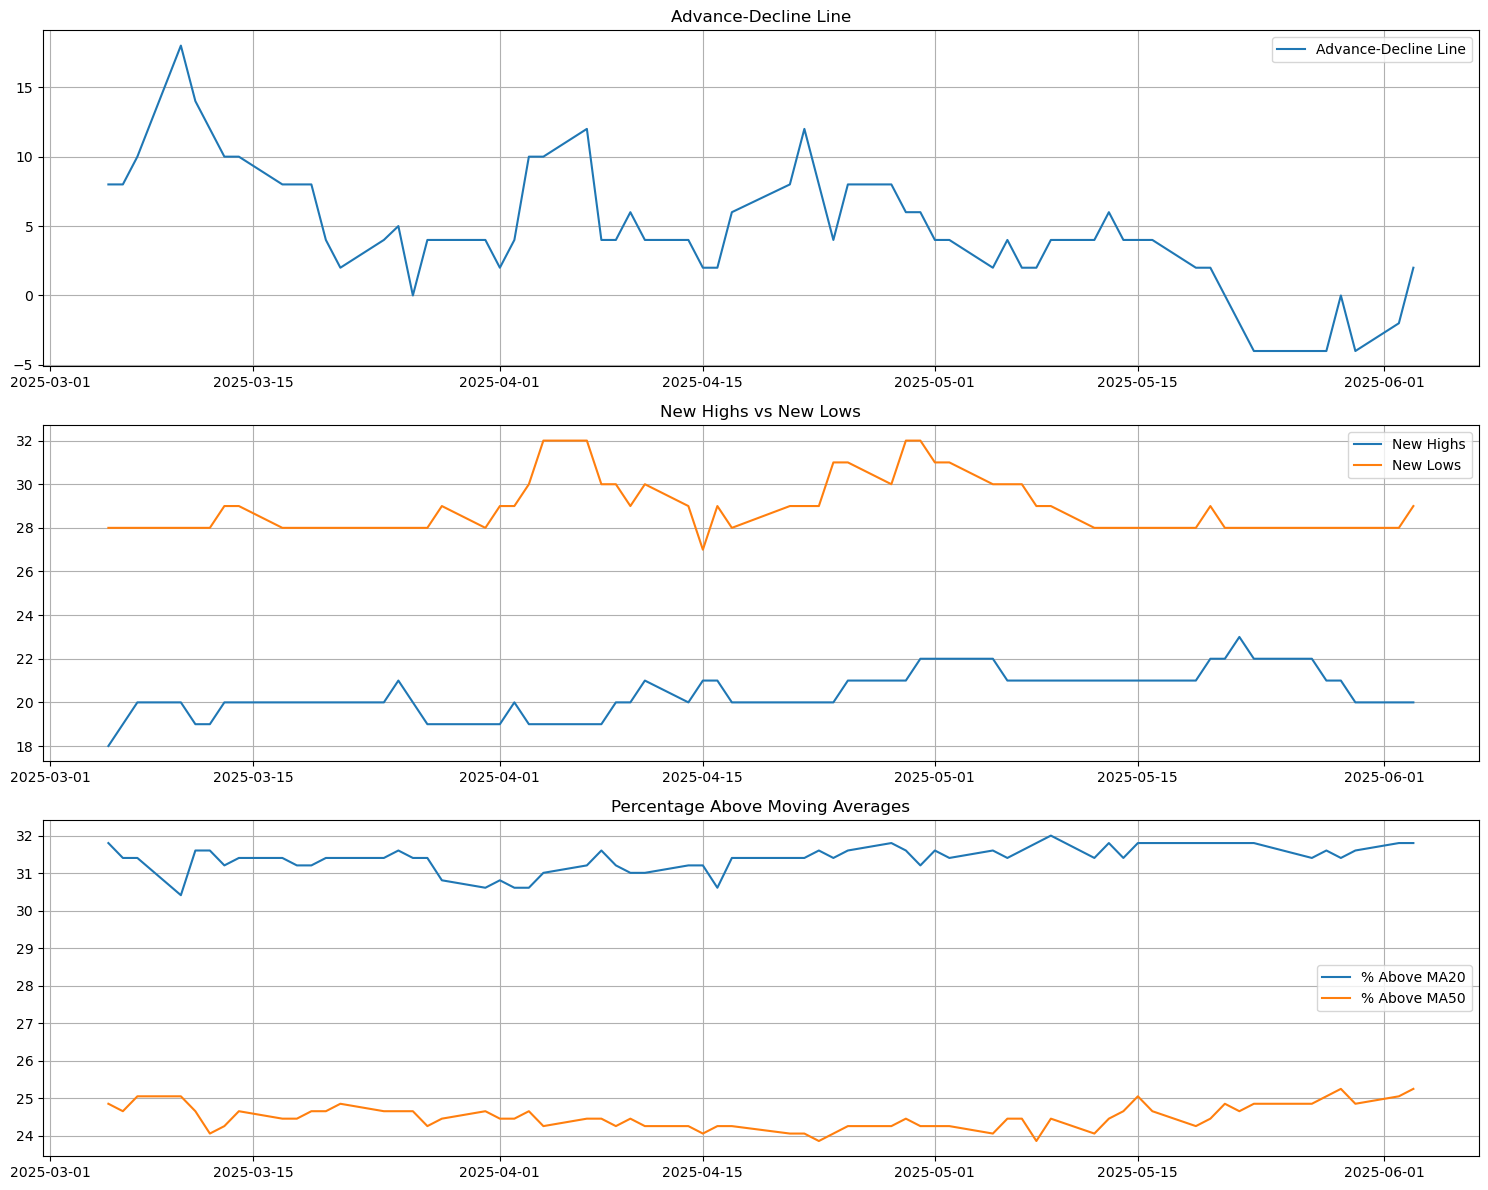

In [30]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Advance-Decline Line
axes[0].plot(market_breadth.index, market_breadth['adv_dec_line'], label='Advance-Decline Line')
axes[0].set_title('Advance-Decline Line')
axes[0].legend()
axes[0].grid(True)

# New Highs and Lows
axes[1].plot(market_breadth.index, market_breadth['new_highs'], label='New Highs')
axes[1].plot(market_breadth.index, market_breadth['new_lows'], label='New Lows')
axes[1].set_title('New Highs vs New Lows')
axes[1].legend()
axes[1].grid(True)

# Percentage Above Moving Averages
axes[2].plot(market_breadth.index, market_breadth['above_ma20'], label='% Above MA20')
axes[2].plot(market_breadth.index, market_breadth['above_ma50'], label='% Above MA50')
axes[2].set_title('Percentage Above Moving Averages')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

## Technical Indicators

We also examine technical signals such as RSI and MACD bullishness.

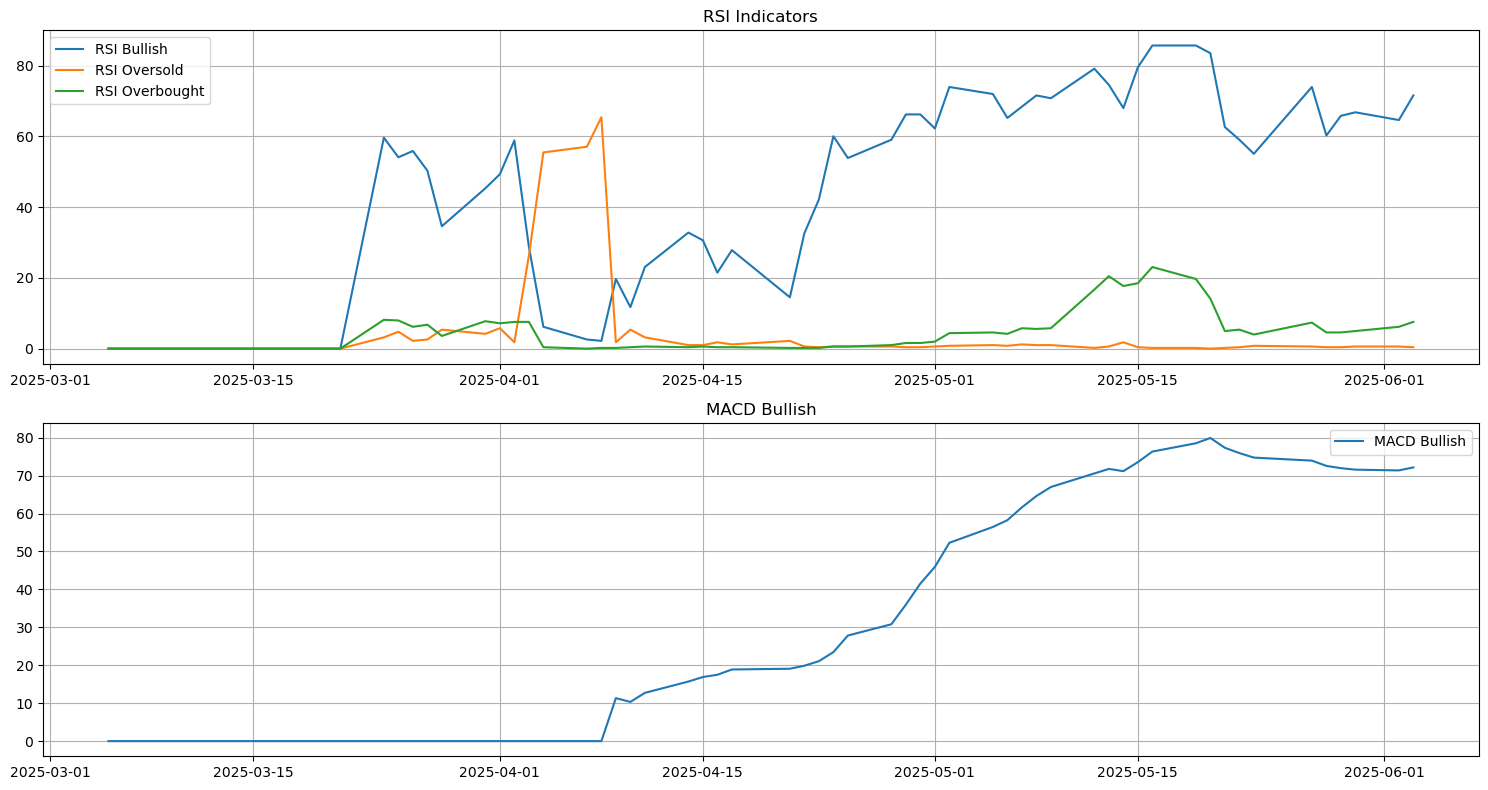

In [31]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# RSI indicators
axes[0].plot(market_breadth.index, market_breadth['rsi_bullish'], label='RSI Bullish')
axes[0].plot(market_breadth.index, market_breadth['rsi_oversold'], label='RSI Oversold')
axes[0].plot(market_breadth.index, market_breadth['rsi_overbought'], label='RSI Overbought')
axes[0].set_title('RSI Indicators')
axes[0].legend()
axes[0].grid(True)

# MACD Bullish
axes[1].plot(market_breadth.index, market_breadth['macd_bullish'], label='MACD Bullish')
axes[1].set_title('MACD Bullish')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Correlation Analysis

The following heatmap shows the correlation between different market features.

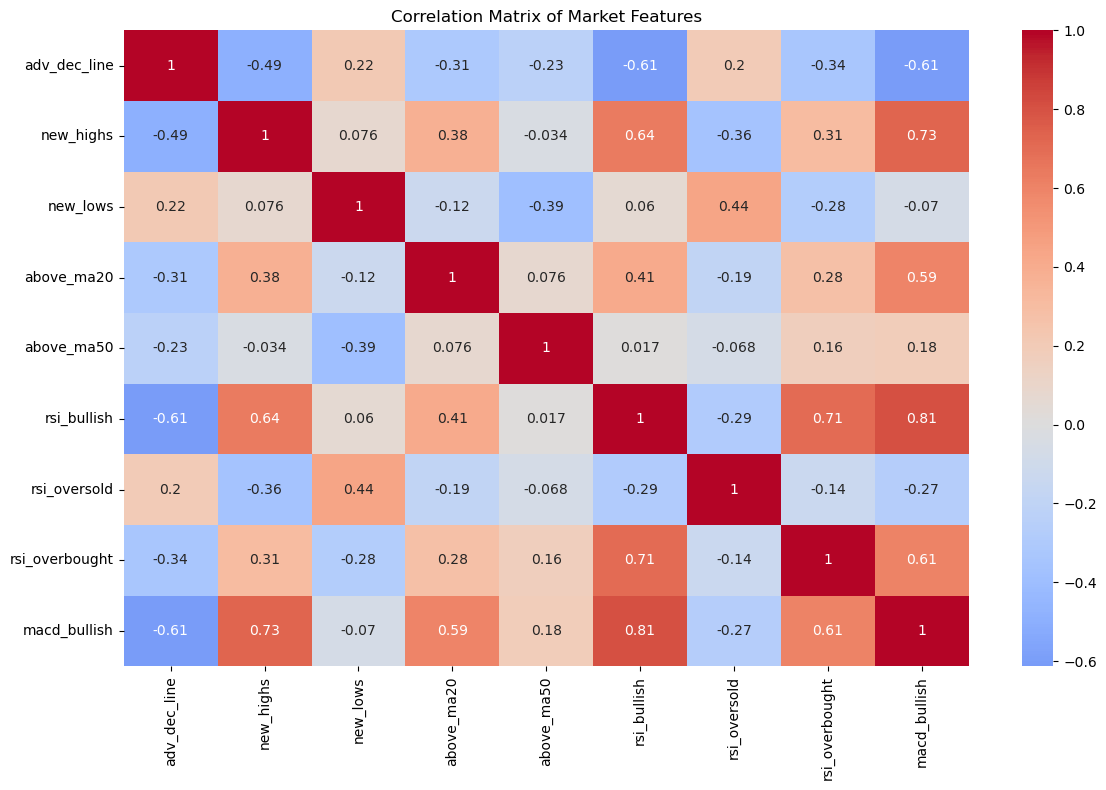

In [7]:
correlation_matrix = market_breadth.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Market Features')
plt.tight_layout()
plt.show()

## Summary Statistics

We compute summary statistics for all market features to understand their distributions.

In [32]:
summary_stats = market_breadth.describe()
display(summary_stats)

,adv_dec_line,new_highs,new_lows,above_ma20,above_ma50,rsi_bullish,rsi_oversold,rsi_overbought,macd_bullish
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,4.777778,20.396825,28.920635,31.411531,24.497460,41.736880,4.272776,4.509451,30.360693
std,4.419329,1.024533,1.235256,0.357068,0.330060,29.556316,12.916291,5.812191,31.513275
min,-4.000000,18.000000,27.000000,30.417495,23.856859,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.000000,28.000000,31.212724,24.254473,8.946322,0.198807,0.198807,0.000000
50%,4.000000,20.000000,28.000000,31.411531,24.453280,53.876740,0.596421,1.988072,18.886680
75%,8.000000,21.000000,29.500000,31.610338,24.652087,66.202783,1.789264,6.461233,68.787276
max,18.000000,23.000000,32.000000,32.007952,25.248509,85.685885,65.407555,23.061630,79.920477


## Sector Mapping

Sector mapping links each ticker to its sector and subsector. For more, see [docs/market_features.md](../docs/market_features.md).

In [33]:
with open('../data/market_features/sector_mapping.json', 'r') as f:
    sector_dict = json.load(f)

sector_mapping = pd.DataFrame(list(sector_dict.items()), columns=['ticker', 'sector'])
display(sector_mapping.tail())
print(f"\n{sector_mapping['sector'].nunique()} distinct sectors:\n{sector_mapping['sector'].unique()}")

,ticker,sector
498,IBM,Technology
499,MLM,Basic Materials
500,GPN,Industrials
501,MCHP,Technology
502,POOL,Industrials



11 distinct sectors:
['Industrials' 'Financial Services' 'Utilities' 'Energy' 'Real Estate'
 'Consumer Cyclical' 'Healthcare' 'Technology' 'Basic Materials'
 'Consumer Defensive' 'Communication Services']


## Sector Performance Analysis

This section analyzes sector-level performance metrics including price, volatility, returns, and momentum indicators. The data is available in both individual sector files and a combined wide-format table.

Sector Performance Data Info:

UTILITIES Sector:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 2025-03-05 to 2025-06-03
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         63 non-null     float64
 1   volatility    63 non-null     float64
 2   volume        63 non-null     int64  
 3   returns_1d    62 non-null     float64
 4   returns_5d    58 non-null     float64
 5   returns_20d   43 non-null     float64
 6   momentum_5d   58 non-null     float64
 7   momentum_20d  43 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 4.4 KB
None

Sample data:
                price  volatility     volume  returns_1d  returns_5d  \
Date                                                                   
2025-05-28  87.646855   57.162509  120421900   -0.013848   -0.017279   
2025-05-29  87.976652   56.354858  105914200    0.003763    0.003934   
2025-05-30  88.758161   56.840269  2160989

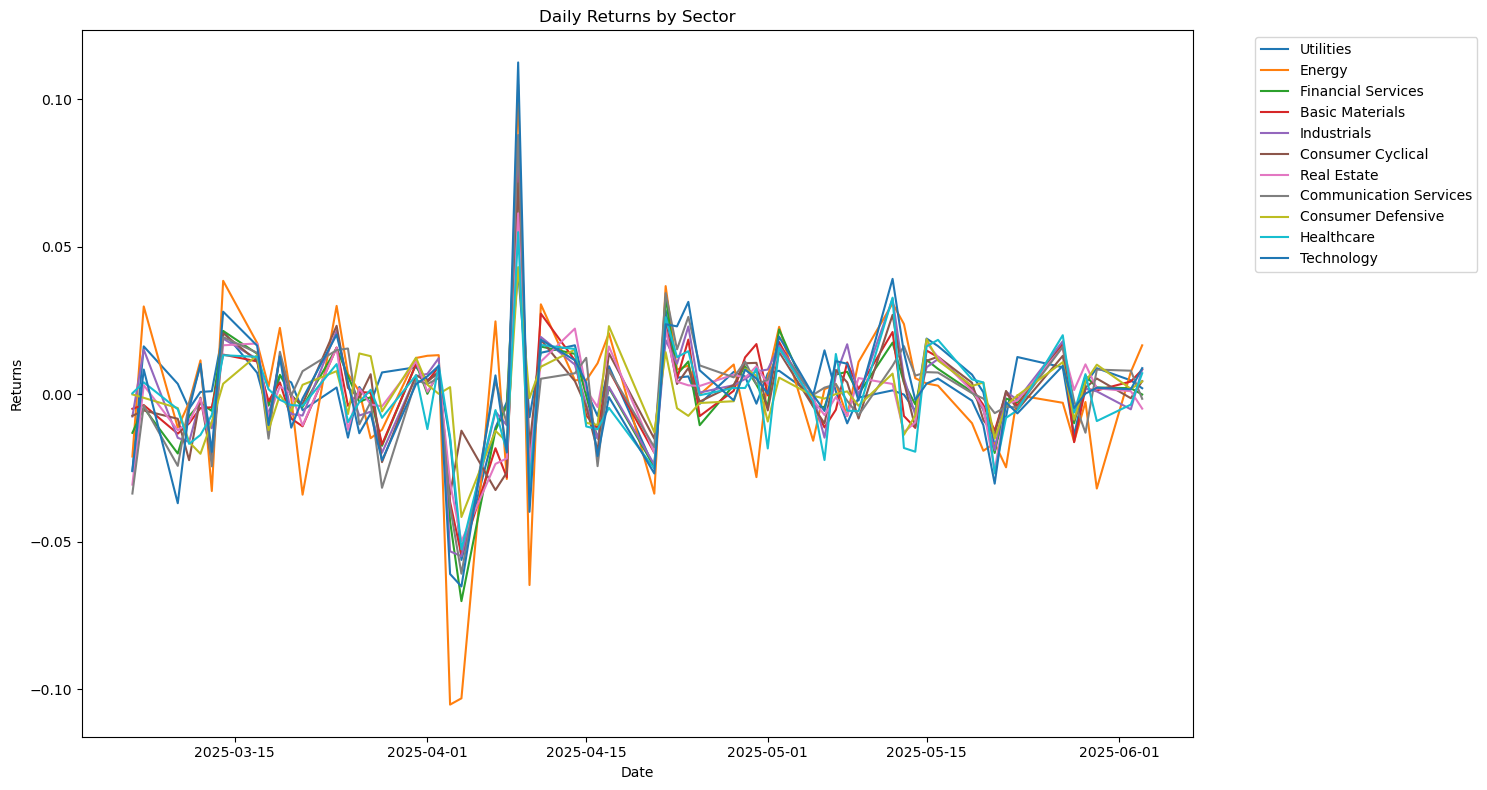

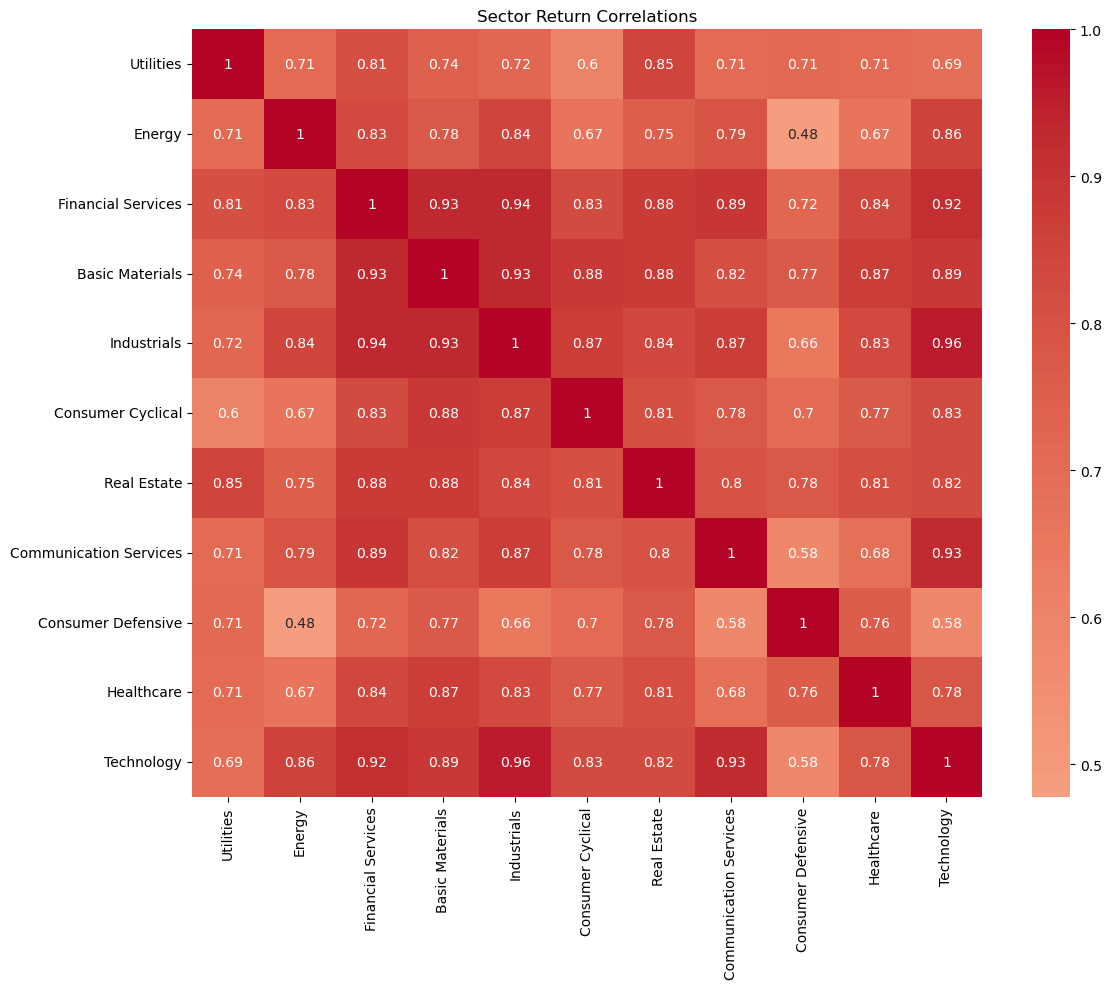

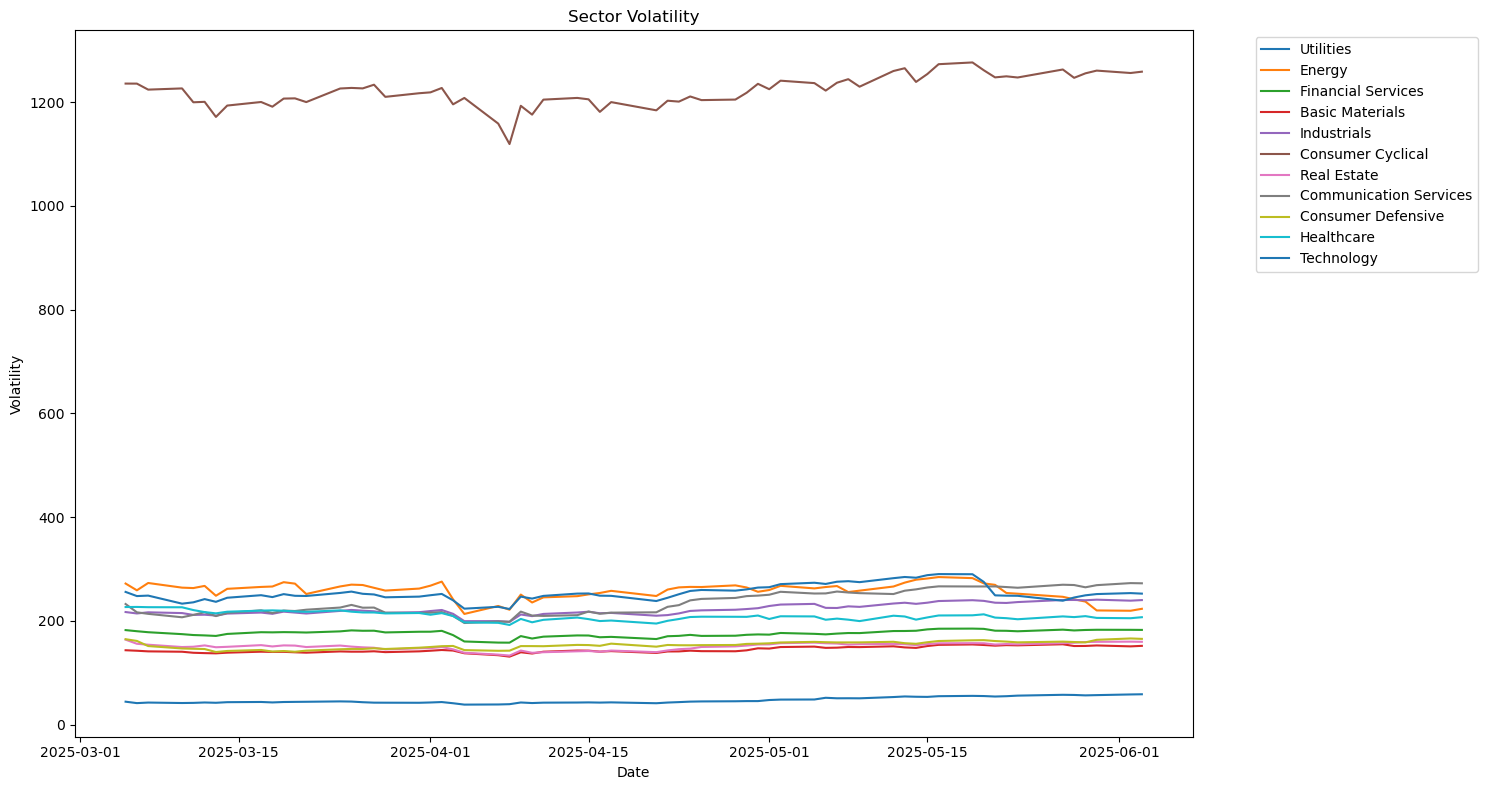

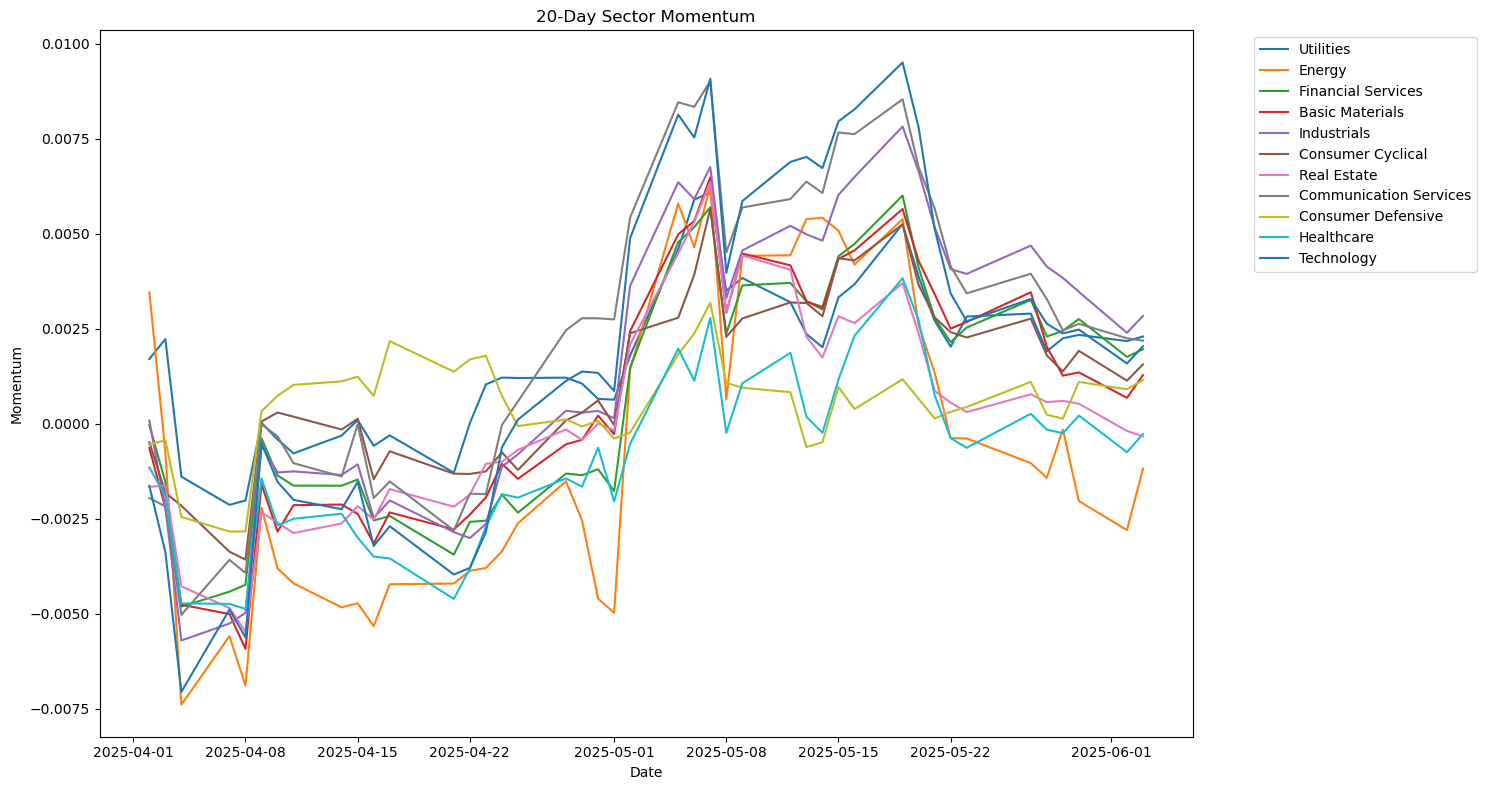


Volatility Statistics by Sector:
                               mean        std          max          min
Utilities                 46.770278   5.823032    58.492131    38.548145
Energy                   257.927261  16.111440   284.416712   213.329408
Financial Services       175.934299   6.253914   185.063435   157.975913
Basic Materials          144.276594   5.773742   154.870712   131.026334
Industrials              222.008424  11.100545   240.841971   197.979470
Consumer Cyclical       1221.272908  29.692306  1276.462565  1119.125976
Real Estate              150.675003   6.726373   163.754294   133.102430
Communication Services   235.027846  23.180823   272.768338   195.861163
Consumer Defensive       153.045789   7.136341   166.074214   139.932352
Healthcare               209.401455   8.182927   226.837936   192.083921
Technology               254.259790  15.575750   290.167836   222.831767


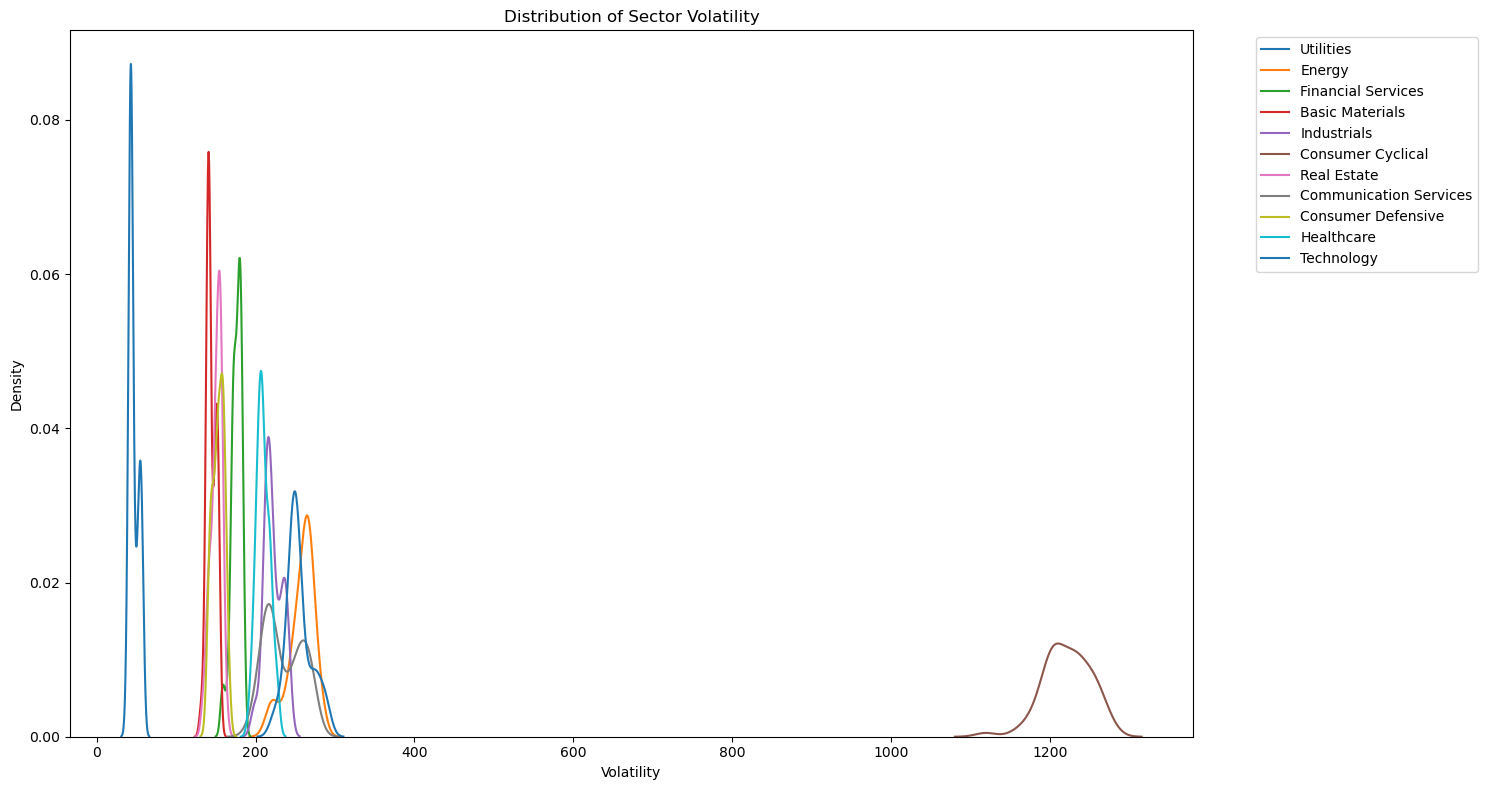

In [34]:
# Load sector performance data
import glob
import os

# Get list of all sector parquet files
sector_files = glob.glob('../data/market_features/sectors/*.parquet')

# Create a dictionary to store sector dataframes
sector_data = {}
for file in sector_files:
    sector_name = os.path.basename(file).replace('.parquet', '')
    sector_data[sector_name] = pd.read_parquet(file)

# Display basic information for each sector
print("Sector Performance Data Info:")
for sector, df in sector_data.items():
    print(f"\n{sector.upper()} Sector:")
    print(df.info())
    print("\nSample data:")
    print(df.tail())

# Create a visualization of sector returns
plt.figure(figsize=(15, 8))
for sector, df in sector_data.items():
    if 'returns_1d' in df.columns:
        plt.plot(df.index, df['returns_1d'], label=sector)
plt.title('Daily Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate sector correlations
# First, create a combined dataframe of returns
returns_data = pd.DataFrame()
for sector, df in sector_data.items():
    if 'returns_1d' in df.columns:
        returns_data[sector] = df['returns_1d']

# Calculate and plot correlation matrix
correlation_matrix = returns_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Sector Return Correlations')
plt.tight_layout()
plt.show()

# Additional sector analysis
# Plot sector volatility
plt.figure(figsize=(15, 8))
for sector, df in sector_data.items():
    if 'volatility' in df.columns:
        plt.plot(df.index, df['volatility'], label=sector)
plt.title('Sector Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot sector momentum
plt.figure(figsize=(15, 8))
for sector, df in sector_data.items():
    if 'momentum_20d' in df.columns:
        plt.plot(df.index, df['momentum_20d'], label=sector)
plt.title('20-Day Sector Momentum')
plt.xlabel('Date')
plt.ylabel('Momentum')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Add this to your sector analysis section
# Calculate and compare volatility statistics
volatility_stats = {}
for sector, df in sector_data.items():
    if 'volatility' in df.columns:
        volatility_stats[sector] = {
            'mean': df['volatility'].mean(),
            'std': df['volatility'].std(),
            'max': df['volatility'].max(),
            'min': df['volatility'].min()
        }

# Create a comparison DataFrame
volatility_comparison = pd.DataFrame(volatility_stats).T
print("\nVolatility Statistics by Sector:")
print(volatility_comparison)

# Plot volatility distributions
plt.figure(figsize=(15, 8))
for sector, df in sector_data.items():
    if 'volatility' in df.columns:
        sns.kdeplot(data=df['volatility'], label=sector)
plt.title('Distribution of Sector Volatility')
plt.xlabel('Volatility')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Market Sentiment Analysis

This section explores market sentiment derived from GDELT news data, including sentiment moving averages, momentum, and volatility measures.

Market Sentiment Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2025-03-05 to 2025-06-02
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sentiment_ma5         86 non-null     float64
 1   sentiment_ma20        71 non-null     float64
 2   sentiment_momentum    85 non-null     float64
 3   sentiment_volatility  71 non-null     float64
 4   sentiment_zscore      71 non-null     float64
dtypes: float64(5)
memory usage: 4.2 KB
None

Sample of sentiment data:
            sentiment_ma5  sentiment_ma20  sentiment_momentum  \
date                                                            
2025-05-29      -1.793754       -1.815751            0.132801   
2025-05-30      -1.749857       -1.801547            0.219486   
2025-05-31      -1.773445       -1.813758           -0.117940   
2025-06-01      -1.869246       -1.833203           -0.479006   
2025-06-02      -1.911797      

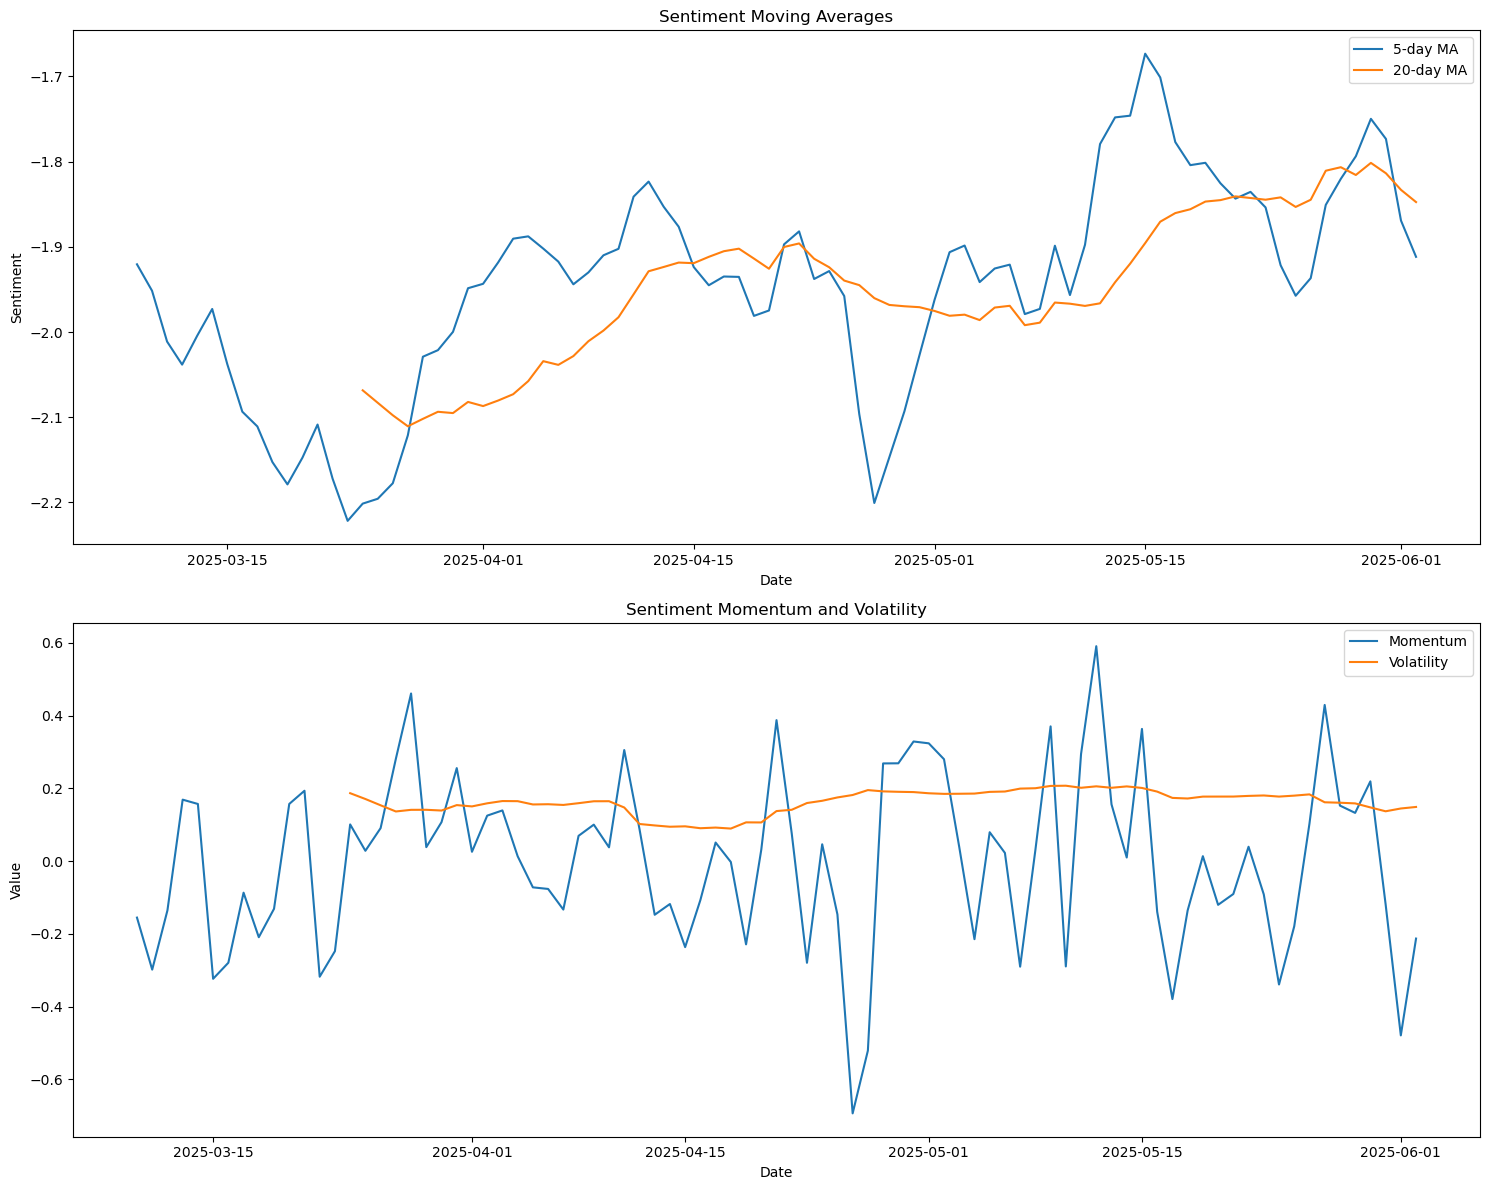

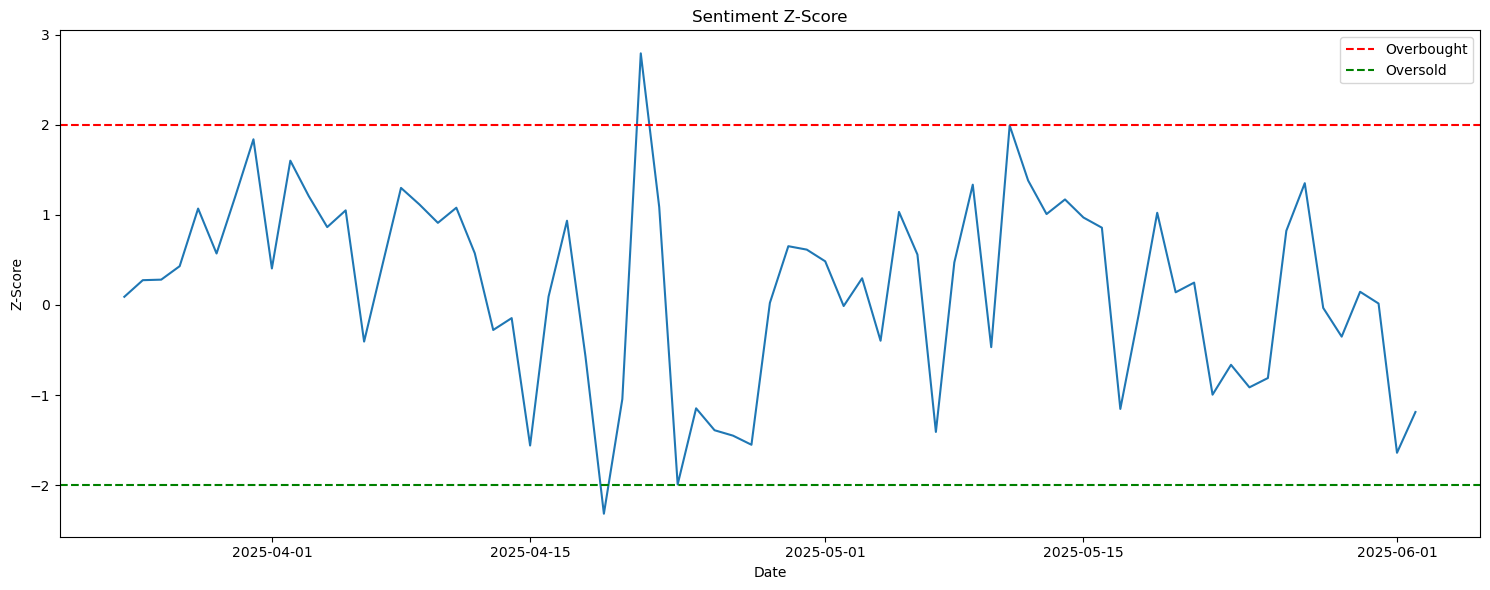

In [35]:
# Load market sentiment data
sentiment_data = pd.read_parquet('../data/market_features/market_sentiment.parquet')

# Display basic information
print("Market Sentiment Data Info:")
print(sentiment_data.info())
print("\nSample of sentiment data:")
print(sentiment_data.tail())

# Create sentiment visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot sentiment moving averages
ax1.plot(sentiment_data.index, sentiment_data['sentiment_ma5'], label='5-day MA')
ax1.plot(sentiment_data.index, sentiment_data['sentiment_ma20'], label='20-day MA')
ax1.set_title('Sentiment Moving Averages')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment')
ax1.legend()

# Plot sentiment momentum and volatility
ax2.plot(sentiment_data.index, sentiment_data['sentiment_momentum'], label='Momentum')
ax2.plot(sentiment_data.index, sentiment_data['sentiment_volatility'], label='Volatility')
ax2.set_title('Sentiment Momentum and Volatility')
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.legend()

plt.tight_layout()
plt.show()

# Plot sentiment z-score
plt.figure(figsize=(15, 6))
plt.plot(sentiment_data.index, sentiment_data['sentiment_zscore'])
plt.axhline(y=2, color='r', linestyle='--', label='Overbought')
plt.axhline(y=-2, color='g', linestyle='--', label='Oversold')
plt.title('Sentiment Z-Score')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.legend()
plt.tight_layout()
plt.show()

## Market Volatility Analysis

This section examines various volatility indicators including VIX metrics, market-wide volatility measures, and cross-sectional volatility statistics.

Market Volatility Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 2025-03-05 to 2025-06-03
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vix                  62 non-null     float64
 1   vix_ma20             43 non-null     float64
 2   vix_std20            43 non-null     float64
 3   market_volatility    42 non-null     float64
 4   vol_of_vol           23 non-null     float64
 5   cross_sectional_vol  62 non-null     float64
 6   avg_correlation      43 non-null     float64
dtypes: float64(7)
memory usage: 3.9 KB
None

Sample of volatility data:
                  vix  vix_ma20  vix_std20  market_volatility  vol_of_vol  \
Date                                                                        
2025-05-28  19.309999   20.8275   2.613161           0.170499    0.131080   
2025-05-29  19.180000   20.5515   2.470223           0.170452    0.119791   
2025-05-30  18.570

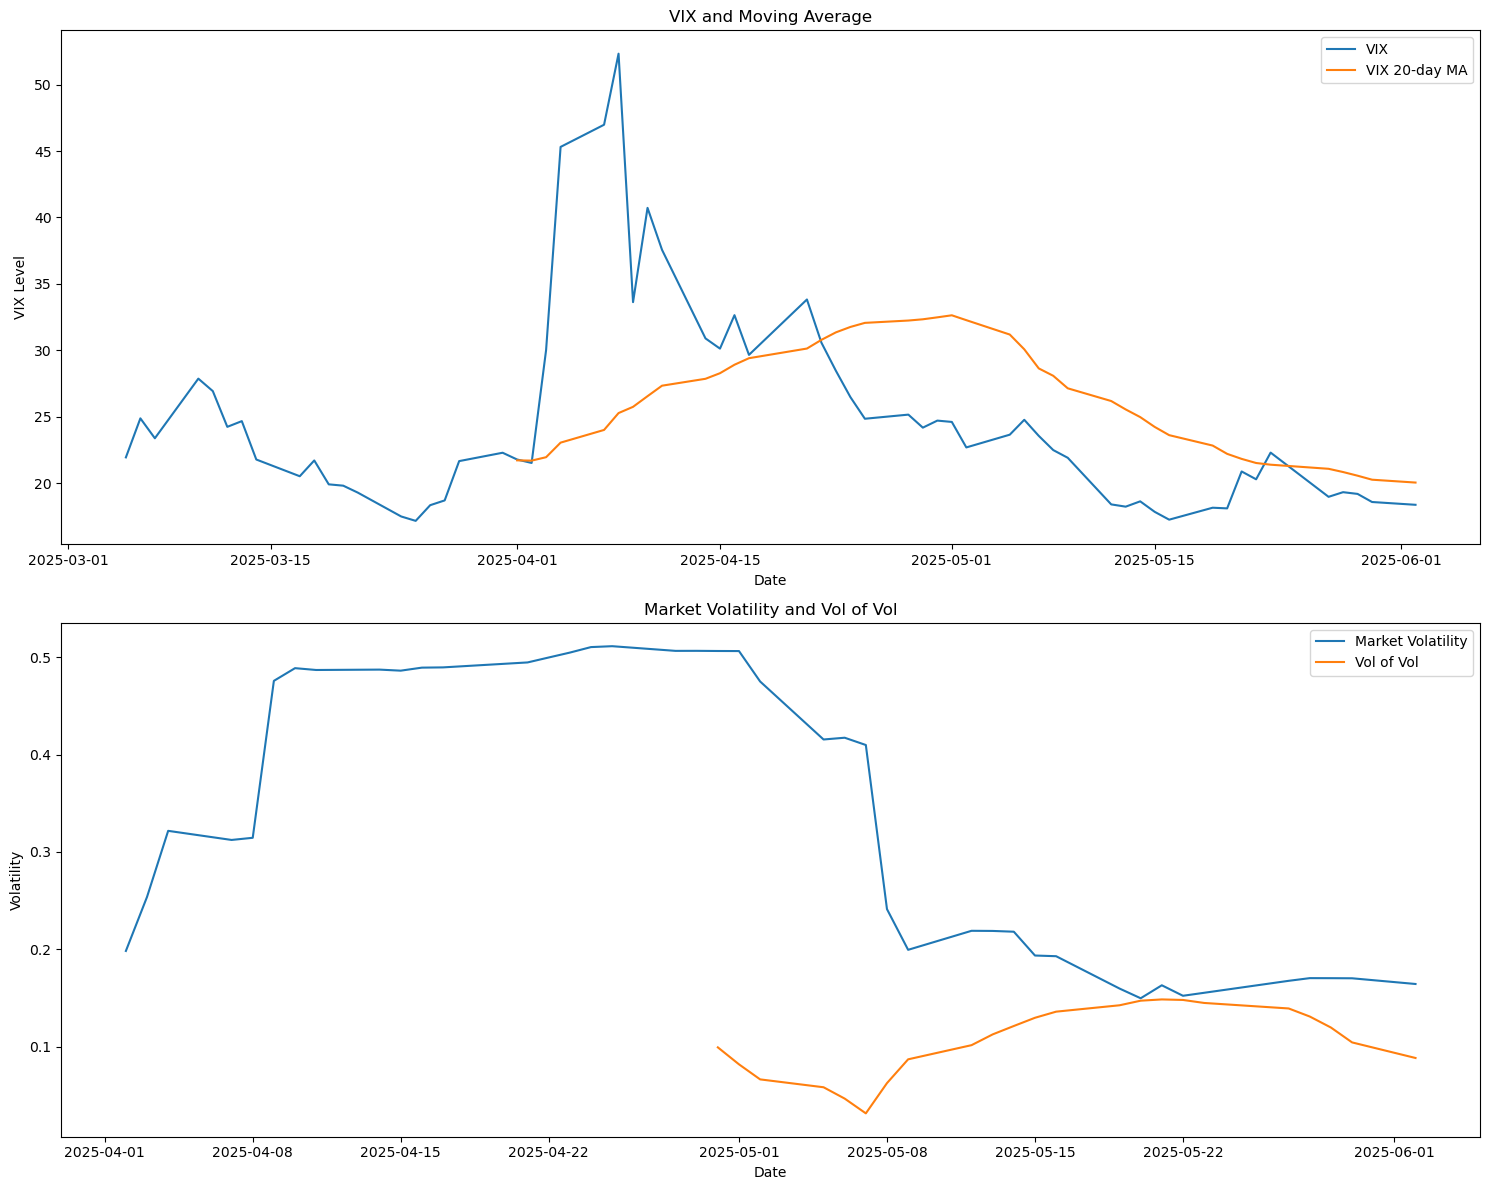

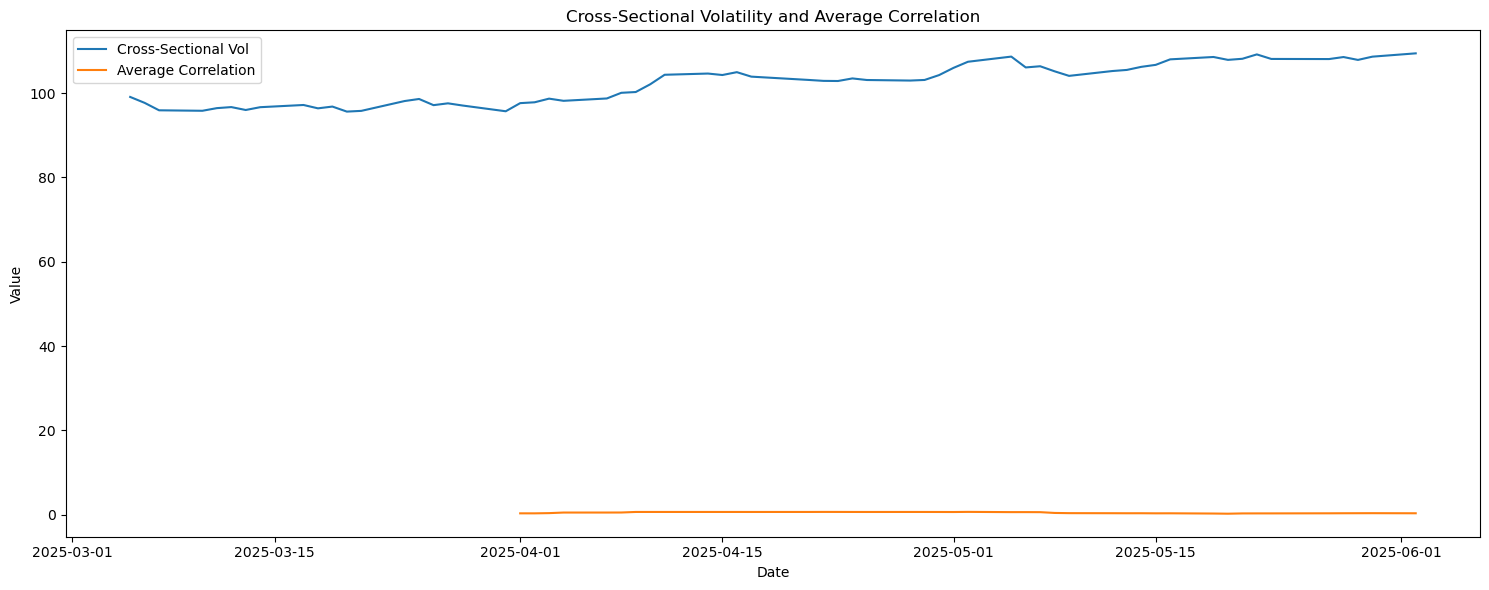

In [36]:
# Load market volatility data
volatility_data = pd.read_parquet('../data/market_features/market_volatility.parquet')

# Display basic information
print("Market Volatility Data Info:")
print(volatility_data.info())
print("\nSample of volatility data:")
print(volatility_data.tail())

# Create volatility visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot VIX and its moving average
ax1.plot(volatility_data.index, volatility_data['vix'], label='VIX')
ax1.plot(volatility_data.index, volatility_data['vix_ma20'], label='VIX 20-day MA')
ax1.set_title('VIX and Moving Average')
ax1.set_xlabel('Date')
ax1.set_ylabel('VIX Level')
ax1.legend()

# Plot market volatility and vol of vol
ax2.plot(volatility_data.index, volatility_data['market_volatility'], label='Market Volatility')
ax2.plot(volatility_data.index, volatility_data['vol_of_vol'], label='Vol of Vol')
ax2.set_title('Market Volatility and Vol of Vol')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volatility')
ax2.legend()

plt.tight_layout()
plt.show()

# Plot cross-sectional measures
plt.figure(figsize=(15, 6))
plt.plot(volatility_data.index, volatility_data['cross_sectional_vol'], label='Cross-Sectional Vol')
plt.plot(volatility_data.index, volatility_data['avg_correlation'], label='Average Correlation')
plt.title('Cross-Sectional Volatility and Average Correlation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()